## Data wrangling

In [ ]:
# In PySpark, the udf stands for "User-Defined Function." It is a feature that allows 
# you to define custom functions that can be applied to DataFrame columns using the PySpark SQL module. 
# These functions are not native to PySpark but can be defined by the user to perform specialized operations
# on the data in a DataFrame column.

# Here's how udf works:

# Define the Function: You create a Python function that performs the desired operation on individual elements 
# of a DataFrame column. This function can be written using standard Python syntax and libraries.

# Register the Function: You use the udf function from pyspark.sql.functions to register 
#your custom Python function as a PySpark User-Defined Function (UDF).

# Apply the Function: Once registered, you can use the UDF with DataFrame transformations like 
#select or withColumn. This allows you to apply your custom function to the DataFrame's columns.

# Here's a simple example of how you might use udf:



In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Create a Spark session
spark = SparkSession.builder.appName("UDFExample").getOrCreate()

# Sample DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Define a Python function
def categorize_age(age):
    if age < 25:
        return "Young"
    elif age >= 25 and age < 35:
        return "Middle-aged"
    else:
        return "Senior"

# Register the function as a UDF
categorize_age_udf = udf(categorize_age)

# Apply the UDF to a DataFrame column
df_with_category = df.withColumn("AgeCategory", categorize_age_udf(df["Age"]))

# Show the result
df_with_category.show()


+-------+---+-----------+
|   Name|Age|AgeCategory|
+-------+---+-----------+
|  Alice| 25|Middle-aged|
|    Bob| 30|Middle-aged|
|Charlie| 22|      Young|
+-------+---+-----------+



In [3]:
# With Pyspark sql syntax
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
from pyspark.sql.types import StringType

# Create a Spark session
spark = SparkSession.builder.appName("UDFExample").getOrCreate()

# Sample DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Register a temporary SQL table
df.createOrReplaceTempView("people")

# Define the UDF using SQL expression
spark.udf.register("categorize_age", lambda age: "Young" if age < 25 else "Middle-aged" if age < 35 else "Senior", StringType())

# Apply the UDF using SQL syntax
df_with_category = spark.sql("SELECT *, categorize_age(Age) AS AgeCategory FROM people")

# Show the result
df_with_category.show()


+-------+---+-----------+
|   Name|Age|AgeCategory|
+-------+---+-----------+
|  Alice| 25|Middle-aged|
|    Bob| 30|Middle-aged|
|Charlie| 22|      Young|
+-------+---+-----------+



In [4]:
# With Pyspark sql syntax
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("CaseExample").getOrCreate()

# Sample DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Register a temporary SQL table
df.createOrReplaceTempView("people")

# Define the SQL query using CASE
query = """
    SELECT *,
           CASE
               WHEN Age < 25 THEN 'Young'
               WHEN Age >= 25 AND Age < 35 THEN 'Middle-aged'
               ELSE 'Senior'
           END AS AgeCategory
    FROM people
"""

# Execute the query
df_with_category = spark.sql(query)

# Show the result
df_with_category.show()


23/08/10 04:22:29 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-------+---+-----------+
|   Name|Age|AgeCategory|
+-------+---+-----------+
|  Alice| 25|Middle-aged|
|    Bob| 30|Middle-aged|
|Charlie| 22|      Young|
+-------+---+-----------+



In [5]:
# 23/08/10 04:22:29 WARN SparkSession: Using an existing Spark session; only runtime SQL 
# configurations will take effect.


# the message is reminding you that you're trying to create a new Spark session 
# while there's already an existing one. The new session won't replace the existing session,
# and any runtime configurations you set will only apply to the current session. 
# It's a good practice to work with the existing Spark session and not create multiple sessions 
# within a single application.

#### Data Wrangling User Loggs 

In [7]:
# Data Wrangling User Logs
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()
path = "/Users/makbulhussain/Downloads/sparkify_log_small.json"
user_log = spark.read.json(path)


In [9]:
# Data Exploration
user_log.take(2)


[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000')]

In [10]:
# Print the schema with .printSchema()

user_log.printSchema()


root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [13]:
# Use the .describe()function with the .show() function to explore basic statistics about the data.


user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [ ]:
# spark.conf.set("spark.sql.debug.maxToStringFields", 100)  # Set to a value that suits your needs

# This will control the number of fields displayed in the string representation of the query execution plan,
# allowing you to see more or fewer details as desired. Keep in mind that setting a very high value might lead to 
# very large output, potentially affecting readability.


In [16]:
# Use .dropDuplicates() to see each kind of page once, and sort by page
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [18]:
# using sql syntax
user_log.createOrReplaceTempView("user_log")
# Equivalent SQL query
sql_query = """
    SELECT DISTINCT page
    FROM user_log
    ORDER BY page
"""

# Execute the SQL query
result = spark.sql(sql_query)

# Show the result
result.show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [21]:
# Select data for all pages where userId is 1046

user_log.select(["userId", "firstname", "page", "song"]) .where(user_log.userId == "1046").show()


+------+---------+--------+--------------------+
|userId|firstname|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

In [24]:
# Equivalent SQL query
sql_query = """
    SELECT userId, firstname, page, song
    FROM user_log
    where userId =1046
"""

# Execute the SQL query
result = spark.sql(sql_query)

# Show the result
result.show()

+------+---------+--------+--------------------+
|userId|firstname|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

+----+-----+
|hour|count|
+----+-----+
|   0|  337|
|   1|  255|
|   2|  271|
|   3|  307|
|   4|  377|
|   5|  371|
|   6|  505|
|   7|  410|
|   8|  320|
|   9|  341|
|  10|  319|
|  11|  306|
|  12|  344|
|  13|  395|
|  14|  324|
|  15|  185|
|  16|  236|
|  17|  238|
|  18|  285|
|  19|  418|
+----+-----+
only showing top 20 rows



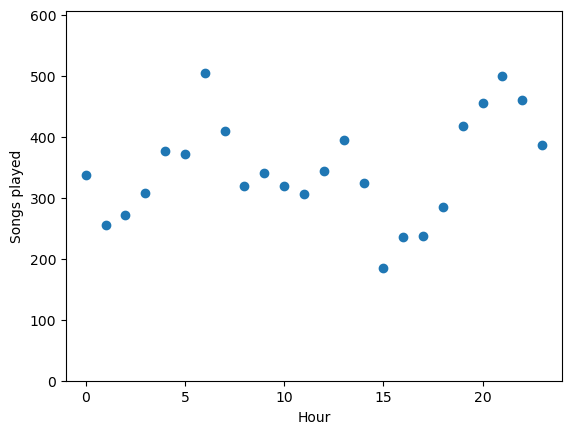

In [31]:
# Calculating Statistics by Hour
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)
user_log = user_log.withColumn("hour", get_hour(user_log.ts))
user_log.head()
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count()\
                .orderBy(user_log.hour.cast("float"))
songs_in_hour.show()
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");


In [30]:
# using sql

# Register the timestamp conversion UDF using SQL functions
spark.udf.register("get_hour", lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

# Equivalent SQL query for calculating songs played in each hour
songs_in_hour = spark.sql("""
    SELECT get_hour(ts) AS hour, COUNT(*) AS count
    FROM user_log
    WHERE page = "NextSong"
    GROUP BY get_hour(ts)
    ORDER BY get_hour(ts)
""")

# Show the result
songs_in_hour.show()


23/08/10 05:07:26 WARN SimpleFunctionRegistry: The function get_hour replaced a previously registered function.


+----+-----+
|hour|count|
+----+-----+
|   0|  337|
|   1|  255|
|  10|  319|
|  11|  306|
|  12|  344|
|  13|  395|
|  14|  324|
|  15|  185|
|  16|  236|
|  17|  238|
|  18|  285|
|  19|  418|
|   2|  271|
|  20|  455|
|  21|  500|
|  22|  461|
|  23|  387|
|   3|  307|
|   4|  377|
|   5|  371|
+----+-----+
only showing top 20 rows



In [32]:
songs_in_hour.describe()

DataFrame[summary: string, hour: string, count: string]

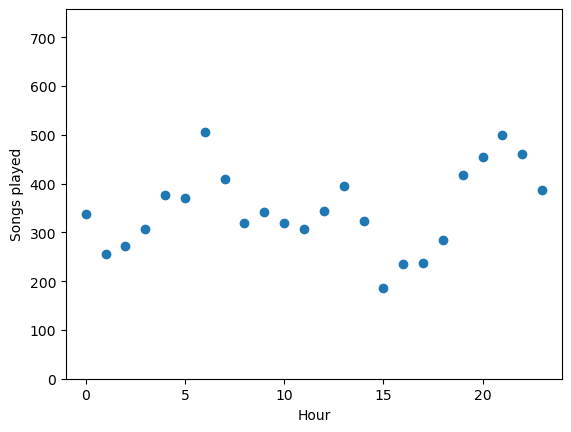

In [39]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.5 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

In [57]:
# Drop Rows with Missing Values
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])
user_log_valid.count()

10000

In [58]:
user_log.select("userId").dropDuplicates().sort("userId").count()

964

In [59]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")
user_log_valid.count()


9664

In [60]:
# Users Downgrade Their Accounts
# Find when users downgrade their accounts and then flag those log entries. 
# Then use a window function and cumulative sum to distinguish each user's data as
# either pre or post-downgrade events.

user_log_valid.filter("page = 'Submit Downgrade'").show()
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))
user_log_valid.head()


+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  16|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='3', downgraded=0)